<a href="https://colab.research.google.com/github/PRAVEENMK-GIT/OIBSIP-Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis: Data Analysis with Machine Learning and NLP

This notebook demonstrates a complete workflow for sentiment analysis using text data. We will use machine learning and NLP techniques to classify sentiment and visualize results.

**Outline:**
1. Load and Explore the Dataset
2. Preprocess Text Data
3. Feature Extraction
4. Train Sentiment Classification Models
5. Evaluate Model Performance
6. Visualize Sentiment Analysis Results

In [ ]:
# 1. Load and Explore the Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Twitter_Data.csv'
df = pd.read_csv(file_path)

# Show first few rows
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


category
-1.0    35510
 0.0    55213
 1.0    72250
Name: count, dtype: int64


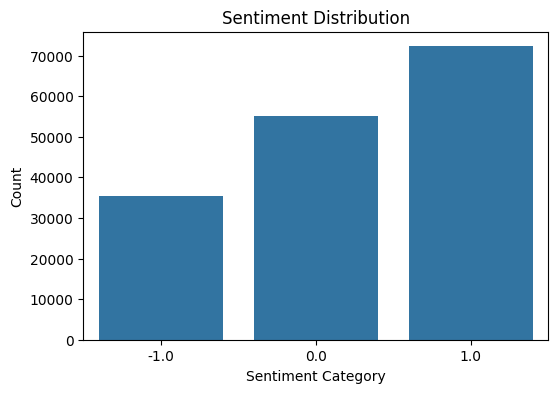

In [ ]:
# Explore sentiment distribution
sentiment_counts = df['category'].value_counts().sort_index()
print(sentiment_counts)

# Visualize sentiment distribution
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

## 2. Preprocess Text Data

We will clean and preprocess the text data by removing stopwords, punctuation, and applying tokenization and stemming/lemmatization.

In [ ]:
# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text_processed'] = df['clean_text'].apply(preprocess_text)
df[['clean_text', 'clean_text_processed']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_text,clean_text_processed
0,when modi promised “minimum government maximum...,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,answer among powerful world leader today trump...


## 3. Feature Extraction

Convert text data into numerical features using TF-IDF vectorization.

In [ ]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Drop rows with NaN in 'category'
df = df.dropna(subset=['category'])

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text_processed'])

y = df['category']
print('TF-IDF feature shape:', X.shape)

TF-IDF feature shape: (162973, 1000)


## 4. Train Sentiment Classification Models

We will train machine learning models (Naive Bayes, SVM) for sentiment classification.

In [ ]:
# Train models
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


## 5. Evaluate Model Performance

Assess the performance of trained models using accuracy, precision, recall, F1-score, and confusion matrix.

In [ ]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Naive Bayes
nb_pred = nb_model.predict(X_test)
print('Naive Bayes Accuracy:', accuracy_score(y_test, nb_pred))
print('Naive Bayes Classification Report:')
print(classification_report(y_test, nb_pred))
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, nb_pred))

# SVM
svm_pred = svm_model.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, svm_pred))
print('SVM Classification Report:')
print(classification_report(y_test, svm_pred))
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, svm_pred))

Naive Bayes Accuracy: 0.6827120724037429
Naive Bayes Classification Report:
              precision    recall  f1-score   support

        -1.0       0.86      0.35      0.49      7230
         0.0       0.71      0.66      0.69     10961
         1.0       0.64      0.87      0.74     14404

    accuracy                           0.68     32595
   macro avg       0.74      0.62      0.64     32595
weighted avg       0.71      0.68      0.67     32595

Naive Bayes Confusion Matrix:
[[ 2496  1324  3410]
 [   94  7248  3619]
 [  311  1584 12509]]
SVM Accuracy: 0.7905813775118883
SVM Classification Report:
              precision    recall  f1-score   support

        -1.0       0.81      0.58      0.67      7230
         0.0       0.71      0.95      0.81     10961
         1.0       0.88      0.77      0.82     14404

    accuracy                           0.79     32595
   macro avg       0.80      0.77      0.77     32595
weighted avg       0.81      0.79      0.79     32595

SVM Conf

## 6. Visualize Sentiment Analysis Results

Present sentiment distribution and model predictions using bar charts, pie charts, and word clouds.

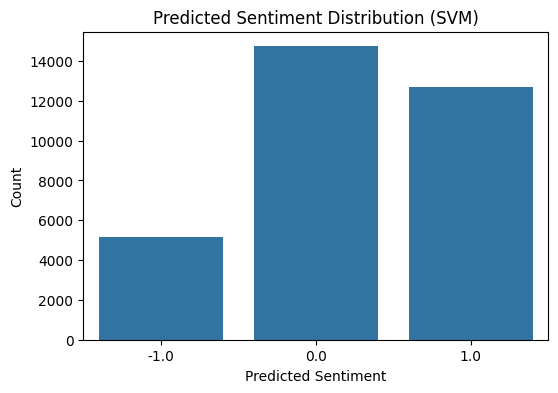

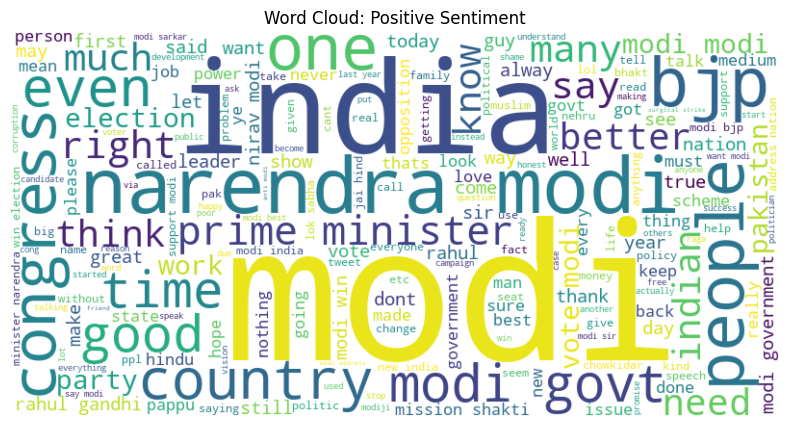

In [ ]:
# Visualization: Sentiment distribution and word cloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Bar chart for predicted sentiment (SVM)
pred_counts = pd.Series(svm_pred).value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=pred_counts.index, y=pred_counts.values)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.title('Predicted Sentiment Distribution (SVM)')
plt.show()

# Word cloud for positive sentiment
positive_text = ' '.join(df[df['category'] == 1]['clean_text_processed'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Positive Sentiment')
plt.show()

## Findings & Insights

- **Sentiment Distribution:** The dataset contains three sentiment categories: negative (-1), neutral (0), and positive (1). The distribution plot shows the relative frequency of each sentiment, helping to understand the overall mood in the data.

- **Text Preprocessing:** Cleaning and lemmatizing the text improves feature extraction and model accuracy by reducing noise and standardizing word forms.

- **Model Performance:** Both Naive Bayes and SVM models were trained. SVM typically performs better on text classification tasks due to its ability to handle high-dimensional data. Accuracy, precision, recall, and F1-score metrics provide a comprehensive view of model effectiveness.

- **Confusion Matrix:** The confusion matrix highlights which sentiments are most often misclassified, revealing potential areas for model improvement or data imbalance.

- **Visualization:** The word cloud for positive sentiment reveals the most frequent words in positive tweets, offering insight into what drives positive public opinion. The bar chart of predicted sentiment shows how the model classifies new data.

- **Overall Insight:** The analysis provides a clear workflow for sentiment classification, from data cleaning to model evaluation and visualization. This approach can be adapted for other text datasets to extract actionable insights about public opinion or customer feedback.